### Super Store Analysis

This is a database that contains important data about sales , such as sales between countries , cities , states and potential products. The main analysis here is to be able to undestand and found patterns that may describe some behaviors and important insights.

### Key Objective 

* Identify key products, regions, categories, sub-categories and customer segments to target or avoid, with the aim of optimizing performance and maximizing profitability

Importing data and libraries

In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Sample - Superstore.csv", encoding= 'ISO-8859-1')
pd.set_option('display.max.columns', None)

### Cheaking Data

In [13]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# df = df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name', 'Product ID', 'Postal Code'], axis=1)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Exploratory Analysis

In [33]:
# Top 10 Sales per State
top_sales_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

# Top 10 Profit per State
top_profit_stated = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

# Top 10 Discount per State
top_discount_stated = df.groupby('State')['Discount'].sum().sort_values(ascending=False).head(10)

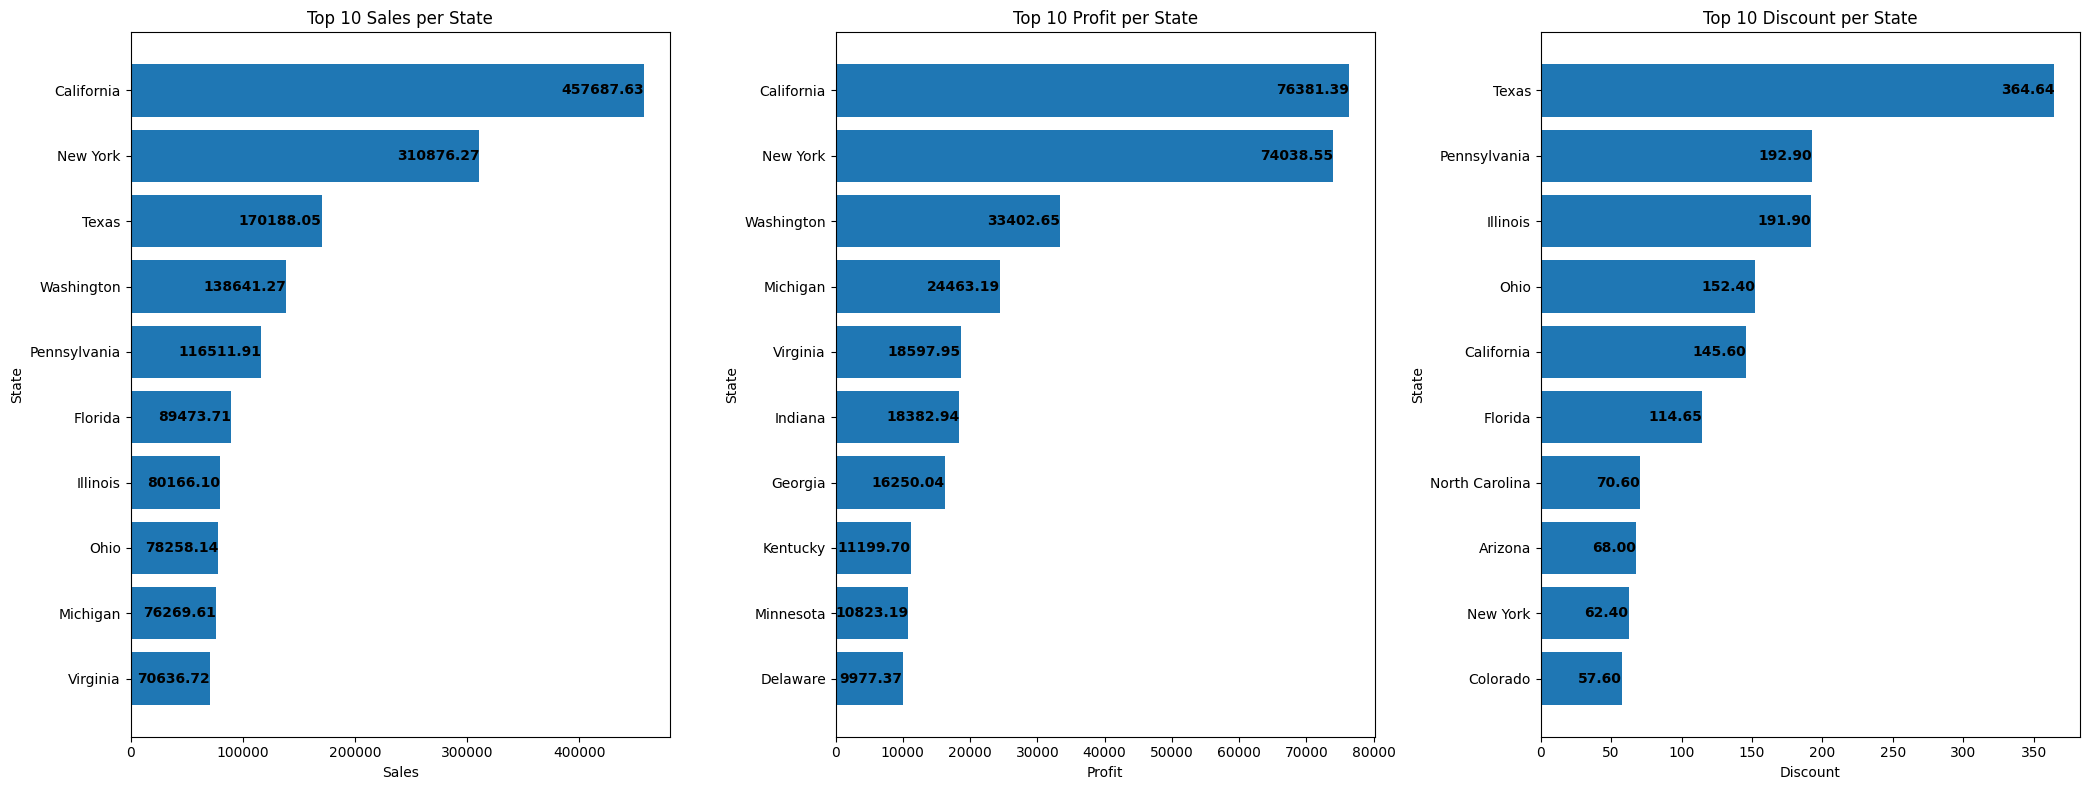

In [34]:
fig, ax = plt.subplots(1, 3, figsize = (21,8))

ax[0].barh(top_sales_state.index, top_sales_state.values)
ax[0].set_title('Top 10 Sales per State')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('State')
ax[0].invert_yaxis()
for i, v in enumerate(top_sales_state.values):
    ax[0].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

ax[1].barh(top_profit_stated.index, top_profit_stated.values)
ax[1].set_title('Top 10 Profit per State')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('State')
ax[1].invert_yaxis()
for i, v in enumerate(top_profit_stated.values):
    ax[1].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

ax[2].barh(top_discount_stated.index, top_discount_stated.values)
ax[2].set_title('Top 10 Discount per State')
ax[2].set_xlabel('Discount')
ax[2].set_ylabel('State')
ax[2].invert_yaxis()
for i, v in enumerate(top_discount_stated.values):
    ax[2].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

plt.tight_layout()

* California and New York seems to have the better sales and profits 

* Texas is a good state to target , because of the sales that represent and the amount of discount that is given. 

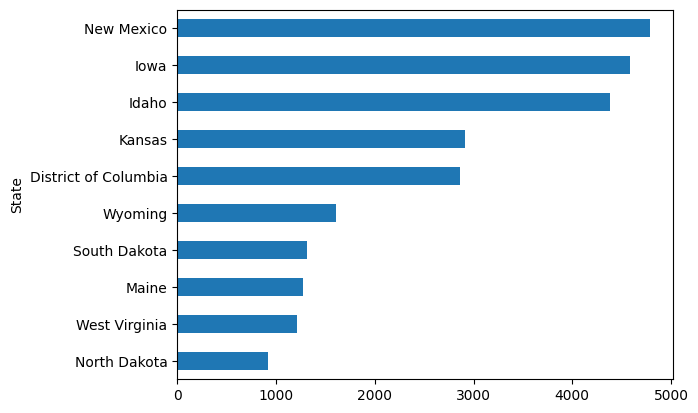

In [42]:
# Top 10 worst Sales per State
top_sales_state = df.groupby('State')['Sales'].sum().sort_values(ascending=True).head(10).plot(kind= 'barh')

 In the other hand North Dakota , South Dakota, West Virginia , Maine and Wyoming are states that didn't even sale more than 20000 dolars. 

In [20]:
# Top 10 Sales per City
top_sales_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Top 10 Profit per City
top_profit_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

# Top 10 Discount per City
top_Discount_city = df.groupby('City')['Discount'].sum().sort_values(ascending=False).head(10)

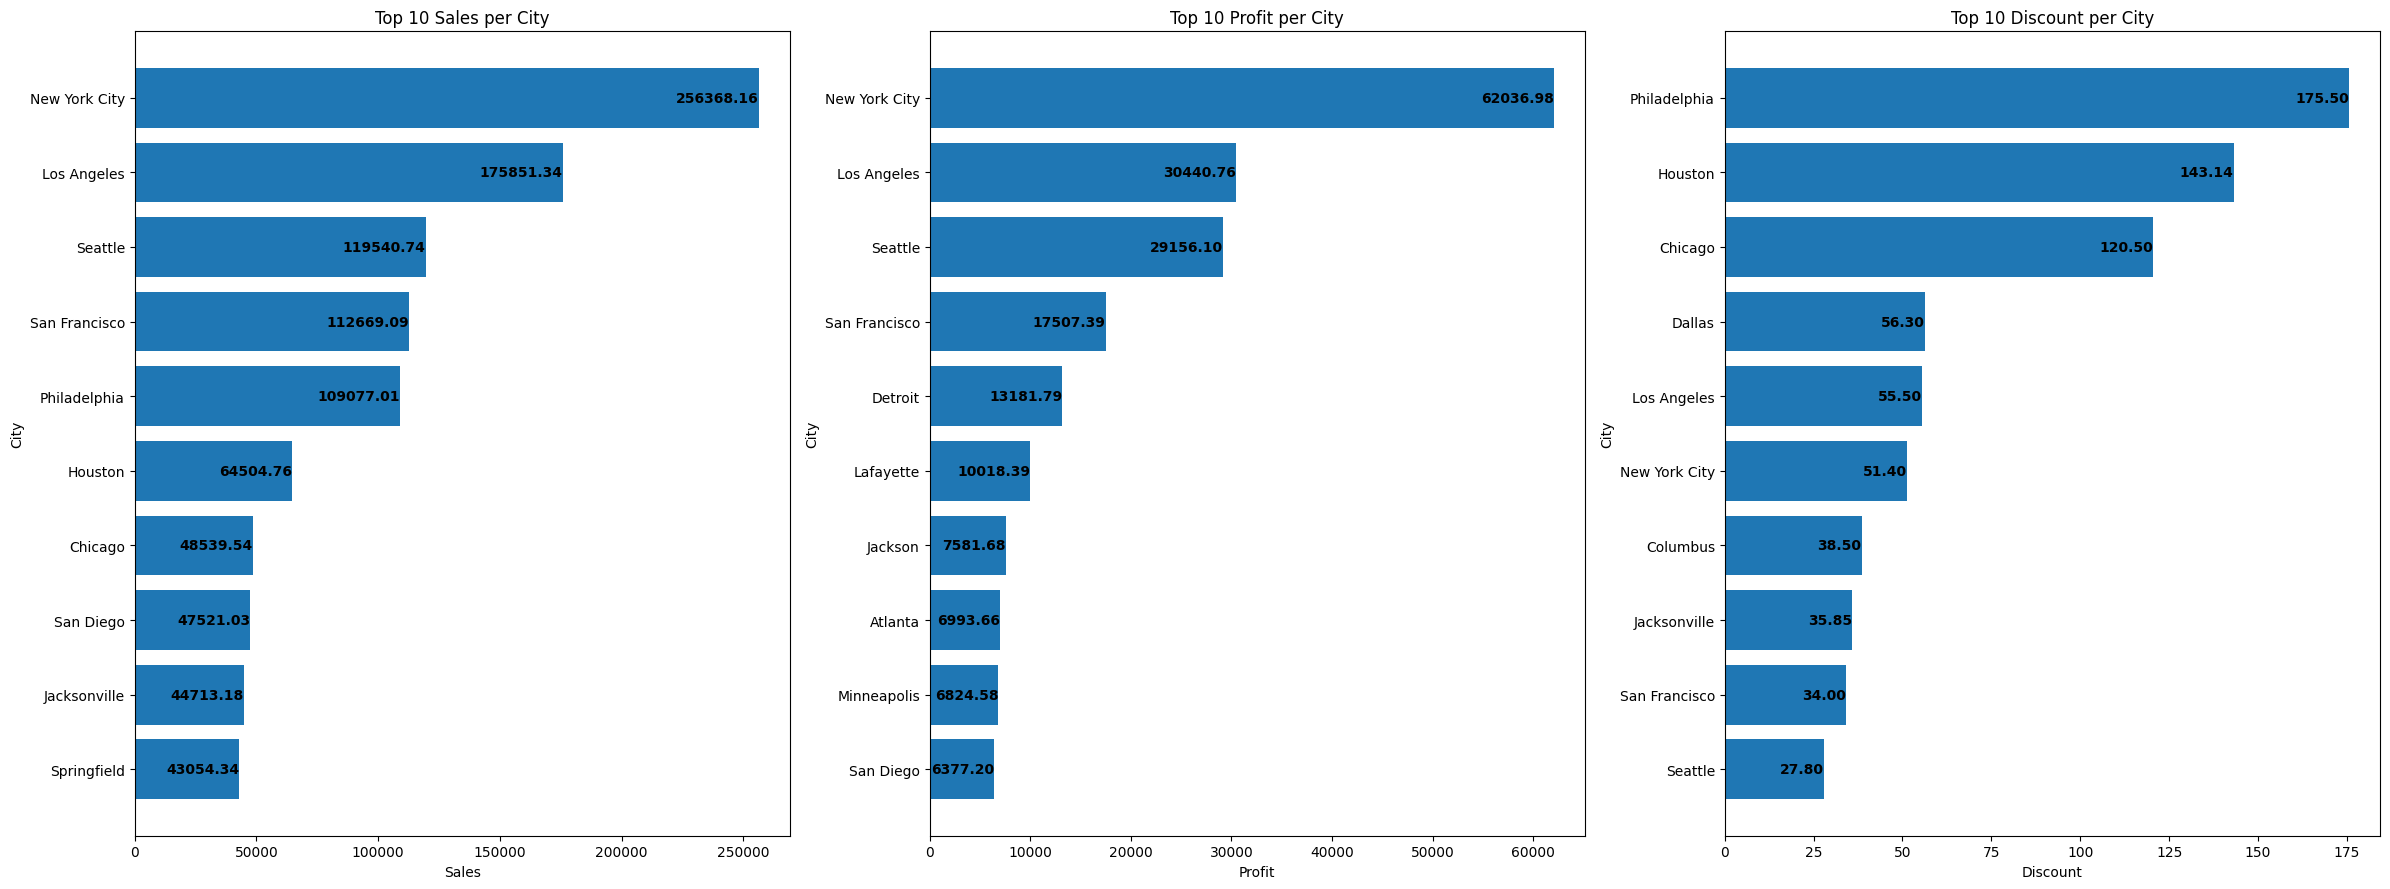

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (24,9))

ax[0].barh(top_sales_city.index, top_sales_city.values)
ax[0].set_title('Top 10 Sales per City')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('City')
ax[0].invert_yaxis()
for i, v in enumerate(top_sales_city.values):
    ax[0].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

ax[1].barh(top_profit_city.index, top_profit_city.values)
ax[1].set_title('Top 10 Profit per City')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('City')
ax[1].invert_yaxis()
for i, v in enumerate(top_profit_city.values):
    ax[1].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

ax[2].barh(top_Discount_city.index, top_Discount_city.values)
ax[2].set_title('Top 10 Discount per City')
ax[2].set_xlabel('Discount')
ax[2].set_ylabel('City')
ax[2].invert_yaxis()
for i, v in enumerate(top_Discount_city.values):
    ax[2].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

plt.tight_layout()

* Again this indicates that cities such as New York City and Los Angeles are potencial cities to target

* So for future sales it would be not surprising to see this cities appearing 

In [22]:
# Months distribution Sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
avg_sales = monthly_sales.mean()
# monthly_sales.nlargest(10)

# Months distribution Profit
monthly_profit = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()
avg_profit = monthly_profit.mean()
# monthly_profit.nlargest(10)

# Months distribution Discount
monthly_discount = df.groupby(df['Order Date'].dt.to_period('M'))['Discount'].sum()
avg_discount = monthly_discount.mean()
# monthly_discount.nlargest(10)

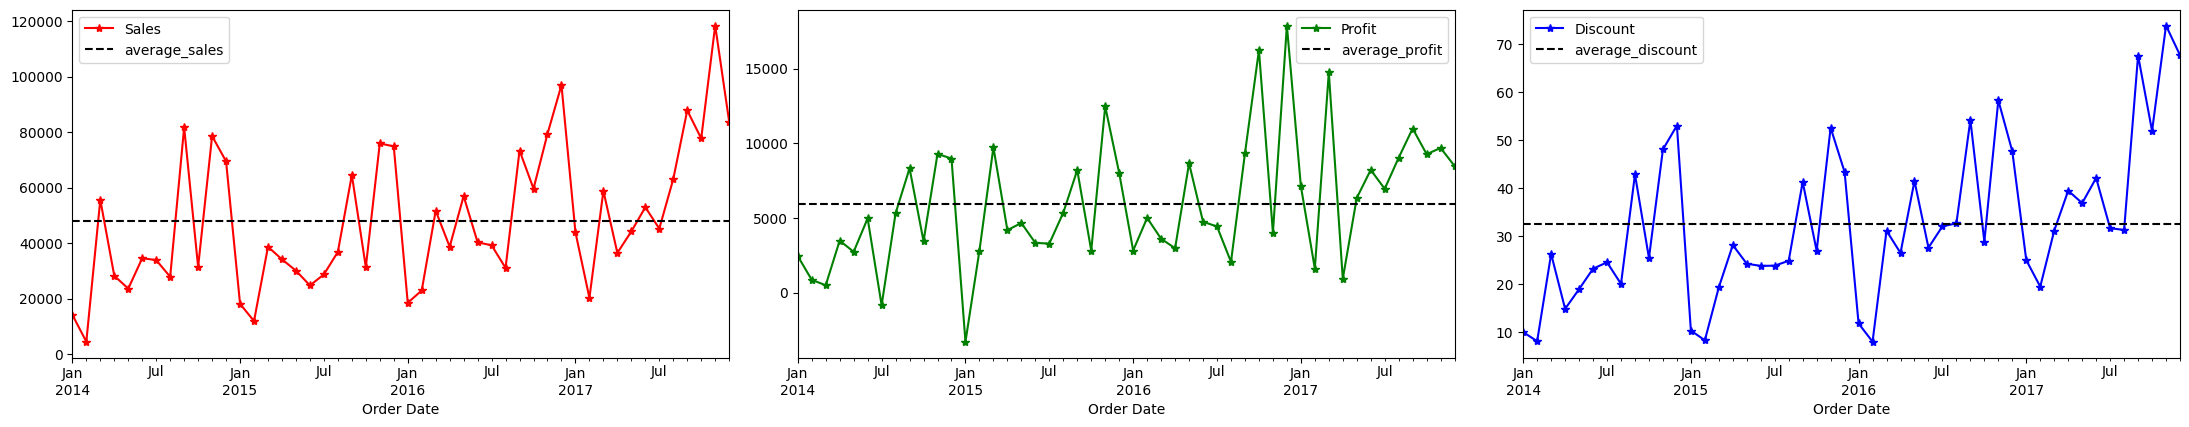

In [23]:
plt.figure(figsize = (22,8))

plt.subplot(2, 3, 1)
monthly_sales.plot(kind= 'line', marker = '*', color = 'red')
plt.axhline(y = avg_sales, color = 'Black', linestyle = '--', label = 'average_sales')
plt.legend()

plt.subplot(2, 3, 2)
monthly_profit.plot(kind= 'line', marker = '*', color = 'green')
plt.axhline(y = avg_profit, color = 'Black', linestyle = '--', label = 'average_profit')
plt.legend()

plt.subplot(2, 3, 3)
monthly_discount.plot(kind= 'line', marker = '*', color = 'blue')
plt.axhline(y = avg_discount, color = 'Black', linestyle = '--', label = 'average_discount')
plt.legend()
plt.tight_layout()


* Now making analysis with potential months and years , we can see that 2014 and 2015 were years very inefficient comparing with 2016 and 2017, for both sales and profit. 

* Also it seems that the first quarter of the year indicates good seasons for selling, for both 2016 and 2017 , but besides those years it seems that sales and profit are getting bigger as the years go by. 

In [24]:
# Year distribution Sales
year_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()
# year_sales.nlargest(10)

# Year distribution Profit
year_profit = df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum()
# year_profit.nlargest(10)

# Year distribution Discount
year_discount = df.groupby(df['Order Date'].dt.to_period('Y'))['Discount'].sum()
# year_discount.nlargest(10)

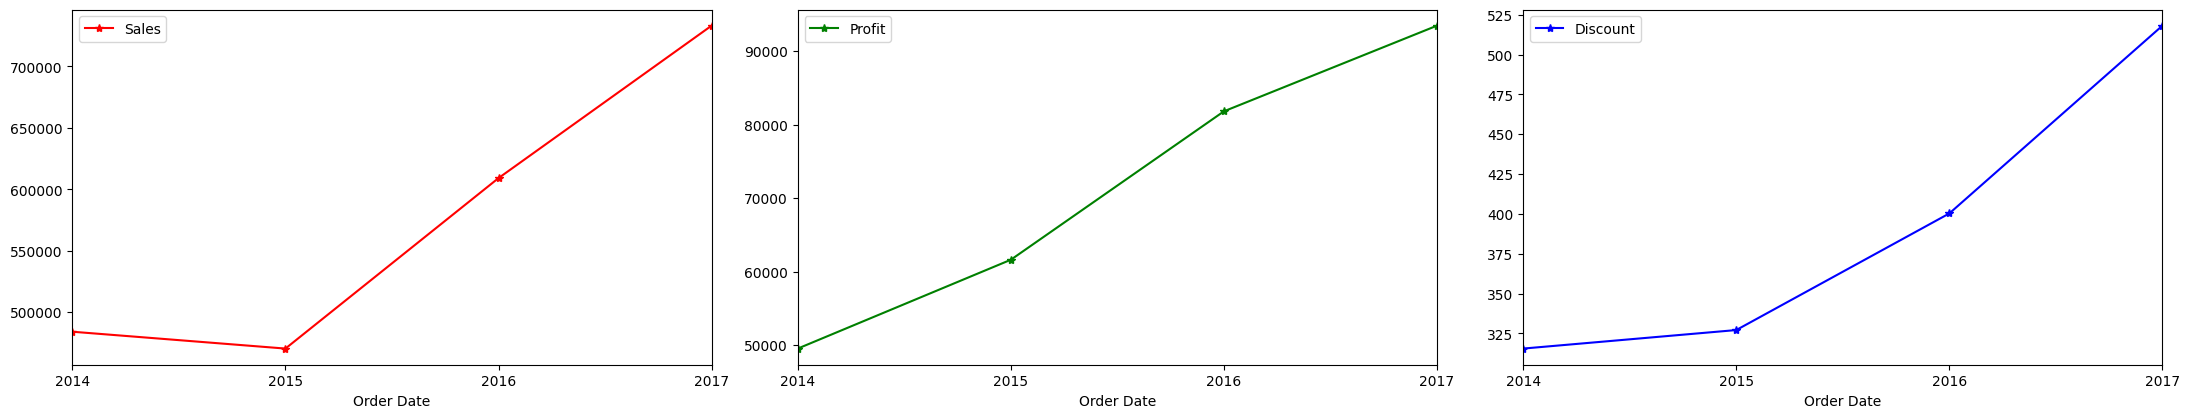

In [25]:
plt.figure(figsize = (22,8))

plt.subplot(2, 3, 1)
year_sales.plot(kind= 'line', marker = '*', color = 'red')
plt.legend()

plt.subplot(2, 3, 2)
year_profit.plot(kind= 'line', marker = '*', color = 'green')
plt.legend()

plt.subplot(2, 3, 3)
year_discount.plot(kind= 'line', marker = '*', color = 'blue')
plt.legend()
plt.tight_layout()

We can see another point of view creating a line plot, and it confirms that 2014 and 2015 were bad years , and that sales and profit are getting bigger as the years go by.

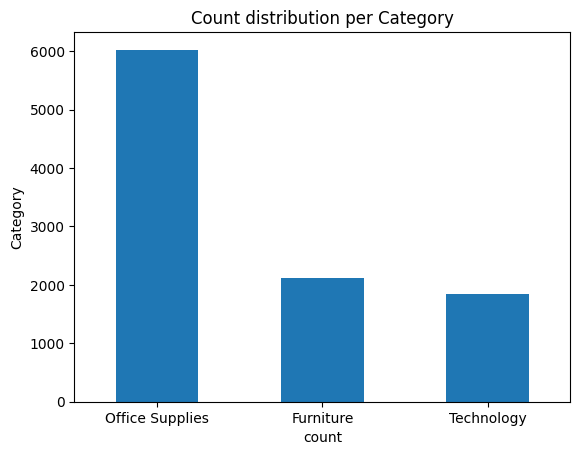

In [26]:
df['Category'].value_counts().plot(kind= 'bar')
plt.title('Count distribution per Category')
plt.xlabel('count')
plt.ylabel('Category')
plt.xticks(rotation=0)
plt.show()

* Office supplies are the most demanded line of products 

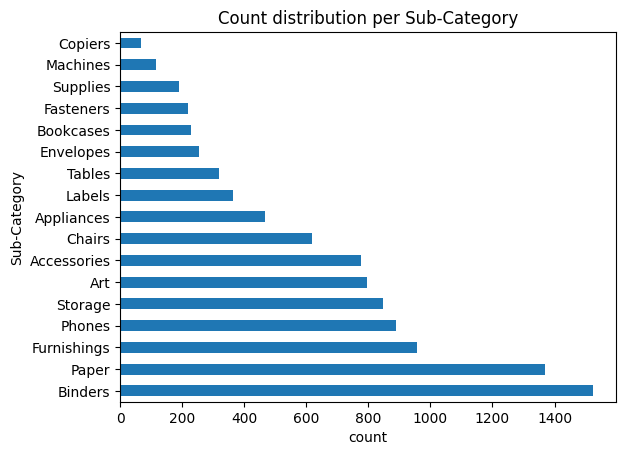

In [27]:
df['Sub-Category'].value_counts().plot(kind= 'barh')
plt.title('Count distribution per Sub-Category')
plt.xlabel('count')
plt.ylabel('Sub-Category')
plt.show()

* Getting an angle more general we can see that binders , papers and furnishings are the most demanded products in the market 

In [28]:
ship_mode_profit_distribution_per_category = df.pivot_table(index= 'Ship Mode', columns= 'Category', values= 'Sales', aggfunc= 'mean')
ship_mode_profit_distribution_per_category = ship_mode_profit_distribution_per_category.sort_values(by= ['Furniture', 'Office Supplies', 'Technology'], ascending=False)
ship_mode_profit_distribution_per_category

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
Second Class,366.016451,139.481773,388.583448
Standard Class,349.223933,117.630907,456.971382
First Class,338.625452,111.354186,463.008608
Same Day,328.981336,89.234604,613.508827


* It seems that buying on second class means more sales , for furniture , office supplies and technology

* Also people who buy on the same day tend to spend more money on technology stuff

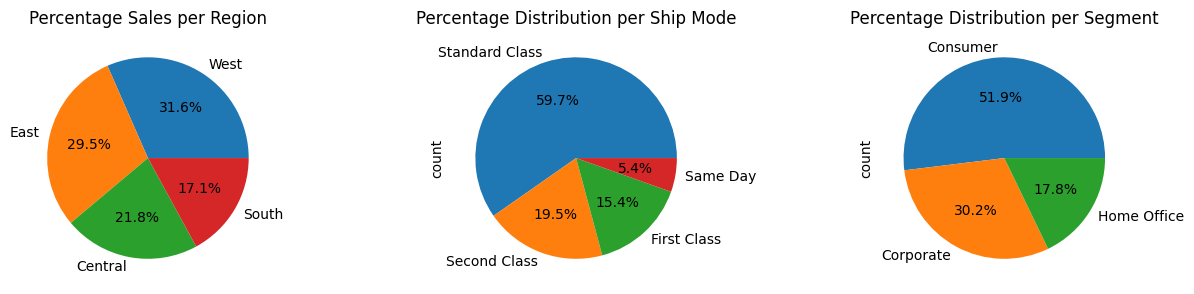

In [30]:
region_sales = pd.DataFrame(df.groupby('Region')['Sales'].sum().sort_values(ascending=False))
region_sales.reset_index()

fig, axes = plt.subplots(1, 3, figsize= (12,6))

axes[0].pie(region_sales['Sales'], labels= region_sales.index, autopct= '%1.1f%%')
axes[0].set_title('Percentage Sales per Region')

df['Ship Mode'].value_counts().plot(kind= 'pie', autopct= '%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage Distribution per Ship Mode')

df['Segment'].value_counts().plot(kind= 'pie', autopct= '%1.1f%%', ax=axes[2])
axes[2].set_title('Percentage Distribution per Segment')

plt.tight_layout()
plt.subplots_adjust(wspace=0.7)
plt.show()


Regions

* The west coast and East coast are the most demanded regions to target

* Also this is an indicative that central regions and south regions are getting bad statistics. 

Ship Mode 

* Buying on standard class seems to be the most popular ship mode
* In the other hand buying in the same day seems to have less frequency
* Also second class and first class dosen't seems to be relevant

Segment 

* Most of the sales indicates consumptions purposes



### General conclusions 

* In the west coast states such as California or Washington are the best places for selling purposes 
* In the east coast states such as New York , Pennsylvania or Florida are the best places for selling purposes 
* Office Supplies are the most demanded products
* Blinders , papers and furnishing seems to have the most frequency
* Initiatives to buy the same day tends to have less frequency
* Standard class is the best focusing 
* Sales seems to be more for consumptions purposes 
* 2014 and 2015 were bad years , but since that moment sales were increasing over the years
* First quarter of the year seems to have good development  
* States such as North Dakota , South Dakota, West Virginia , Maine and Wyoming are places that didn't even sale more than 20000 dolars. 

  * This can lead to two options, adjusting strategies for better selling in this places or take off the view this states